In [1]:
%%HTML
<h1>Import Data</h1>

In [2]:
import pandas as pd
df1 = pd.read_csv('./data/210730_HNX_ALL.txt', sep = ',')
df2 = pd.read_csv('./data/210730_HOSE_ALL.txt', sep = ',')

frames = [df1, df2]
df = pd.concat(frames, ignore_index = True)
df.head()

,<Ticker>,<DTYYYYMMDD>,<Open>,<High>,<Low>,<Close>,<Volume>
0,AAV,20210730,12.4,12.4,12.1,12.4,166400
1,ABT,20210730,26.0,27.2,26.0,27.1,1207
2,ACM,20210730,2.3,2.4,2.3,2.4,592463
3,ADC,20210730,21.5,21.5,21.5,21.5,0
4,ALT,20210730,12.7,12.7,12.7,12.7,0


In [3]:
%%HTML
<h1>Extract Data</h1>

In [4]:
#Remove redundant characters
df.columns=df.columns.str.replace('[<,>]','', regex=True)
print(df)

        Ticker  DTYYYYMMDD    Open    High     Low   Close  Volume
0          AAV    20210730  12.400  12.400  12.100  12.400  166400
1          ABT    20210730  26.000  27.200  26.000  27.100    1207
2          ACM    20210730   2.300   2.400   2.300   2.400  592463
3          ADC    20210730  21.500  21.500  21.500  21.500       0
4          ALT    20210730  12.700  12.700  12.700  12.700       0
...        ...         ...     ...     ...     ...     ...     ...
1436015    VSC    20120103   6.807   6.807   6.572   6.572   15658
1436016    VSH    20120103   5.052   5.113   5.052   5.052  211961
1436017    VSI    20120103   1.844   1.844   1.684   1.684    6258
1436018    VTB    20120103   2.538   2.538   2.538   2.538      26
1436019    VTO    20120103   1.747   1.747   1.707   1.707   36310

[1436020 rows x 7 columns]


In [5]:
#Drop duplicate records
df_modified = df.drop_duplicates(subset = ['Ticker', 'DTYYYYMMDD'], keep = 'first')
print(df_modified)

        Ticker  DTYYYYMMDD    Open    High     Low   Close  Volume
0          AAV    20210730  12.400  12.400  12.100  12.400  166400
1          ABT    20210730  26.000  27.200  26.000  27.100    1207
2          ACM    20210730   2.300   2.400   2.300   2.400  592463
3          ADC    20210730  21.500  21.500  21.500  21.500       0
4          ALT    20210730  12.700  12.700  12.700  12.700       0
...        ...         ...     ...     ...     ...     ...     ...
1436015    VSC    20120103   6.807   6.807   6.572   6.572   15658
1436016    VSH    20120103   5.052   5.113   5.052   5.052  211961
1436017    VSI    20120103   1.844   1.844   1.684   1.684    6258
1436018    VTB    20120103   2.538   2.538   2.538   2.538      26
1436019    VTO    20120103   1.747   1.747   1.707   1.707   36310

[1436020 rows x 7 columns]


In [6]:
#Pivot the table
data = df_modified.pivot(index='DTYYYYMMDD', columns='Ticker', values = 'Close')
print(data)

Ticker         AAA     AAM   AAT   AAV    ABS     ABT     ACB     ACC     ACL  \
DTYYYYMMDD                                                                      
20120103     2.950   8.336   NaN   NaN    NaN  13.371   5.760   5.259   5.411   
20120104     2.976   8.487   NaN   NaN    NaN  13.409   5.760   5.289   5.349   
20120105     2.950   8.374   NaN   NaN    NaN  13.669   5.939   5.053   5.349   
20120106     2.925   8.374   NaN   NaN    NaN  13.036   5.819   5.289   5.349   
20120109     2.950   8.374   NaN   NaN    NaN  13.036   5.790   5.289   5.349   
...            ...     ...   ...   ...    ...     ...     ...     ...     ...   
20210726    15.450  10.800  17.5  12.4  18.55  27.600  32.700  14.000  11.400   
20210727    16.000  10.500  17.7  12.4  18.90  27.600  33.150  13.700  11.600   
20210728    16.300  10.100  17.6  12.4  19.35  27.000  33.150  13.700  11.600   
20210729    16.150  10.800  17.6  12.4  19.95  27.000  34.150  13.700  11.500   
20210730    16.150  10.900  

In [7]:
%%HTML
<h1>Filter Data</h1>

In [8]:
%%HTML
<h3>Here we only consider data between 02/01/2018 and 28/12/2018 (a total of 250 days)</h3>

In [9]:
data = data.loc[20180401:20180630]
print(data)

Ticker         AAA    AAM  AAT     AAV  ABS     ABT     ACB     ACC    ACL  \
DTYYYYMMDD                                                                   
20180402    15.914  6.935  NaN     NaN  NaN  29.091  20.228  11.342  3.405   
20180403    16.998  7.101  NaN     NaN  NaN  28.419  20.146  11.564  3.604   
20180404    17.946  6.935  NaN     NaN  NaN  28.775  20.187  11.564  3.600   
20180405    17.574  6.935  NaN     NaN  NaN  28.735  20.475  11.287  3.446   
20180406    17.540  6.902  NaN     NaN  NaN  28.854  20.927  11.287  3.559   
...            ...    ...  ...     ...  ...     ...     ...     ...    ...   
20180625    17.138  6.935  NaN  10.758  NaN  30.040  16.158  10.916  4.054   
20180626    17.005  7.134  NaN  11.779  NaN  30.395  15.911  10.916  4.054   
20180627    16.609  7.035  NaN  11.235  NaN  30.395  15.418  10.916  4.054   
20180628    16.653  7.101  NaN  11.303  NaN  30.040  14.842  10.795  4.054   
20180629    16.653  7.134  NaN  11.371  NaN  30.040  14.637  10.

In [10]:
%%HTML
<h1>Clean Data</h1>

In [11]:
pd.set_option('display.precision', 3)

In [12]:
#Check for missing values
data.isnull().values.any()

True

<AxesSubplot:>

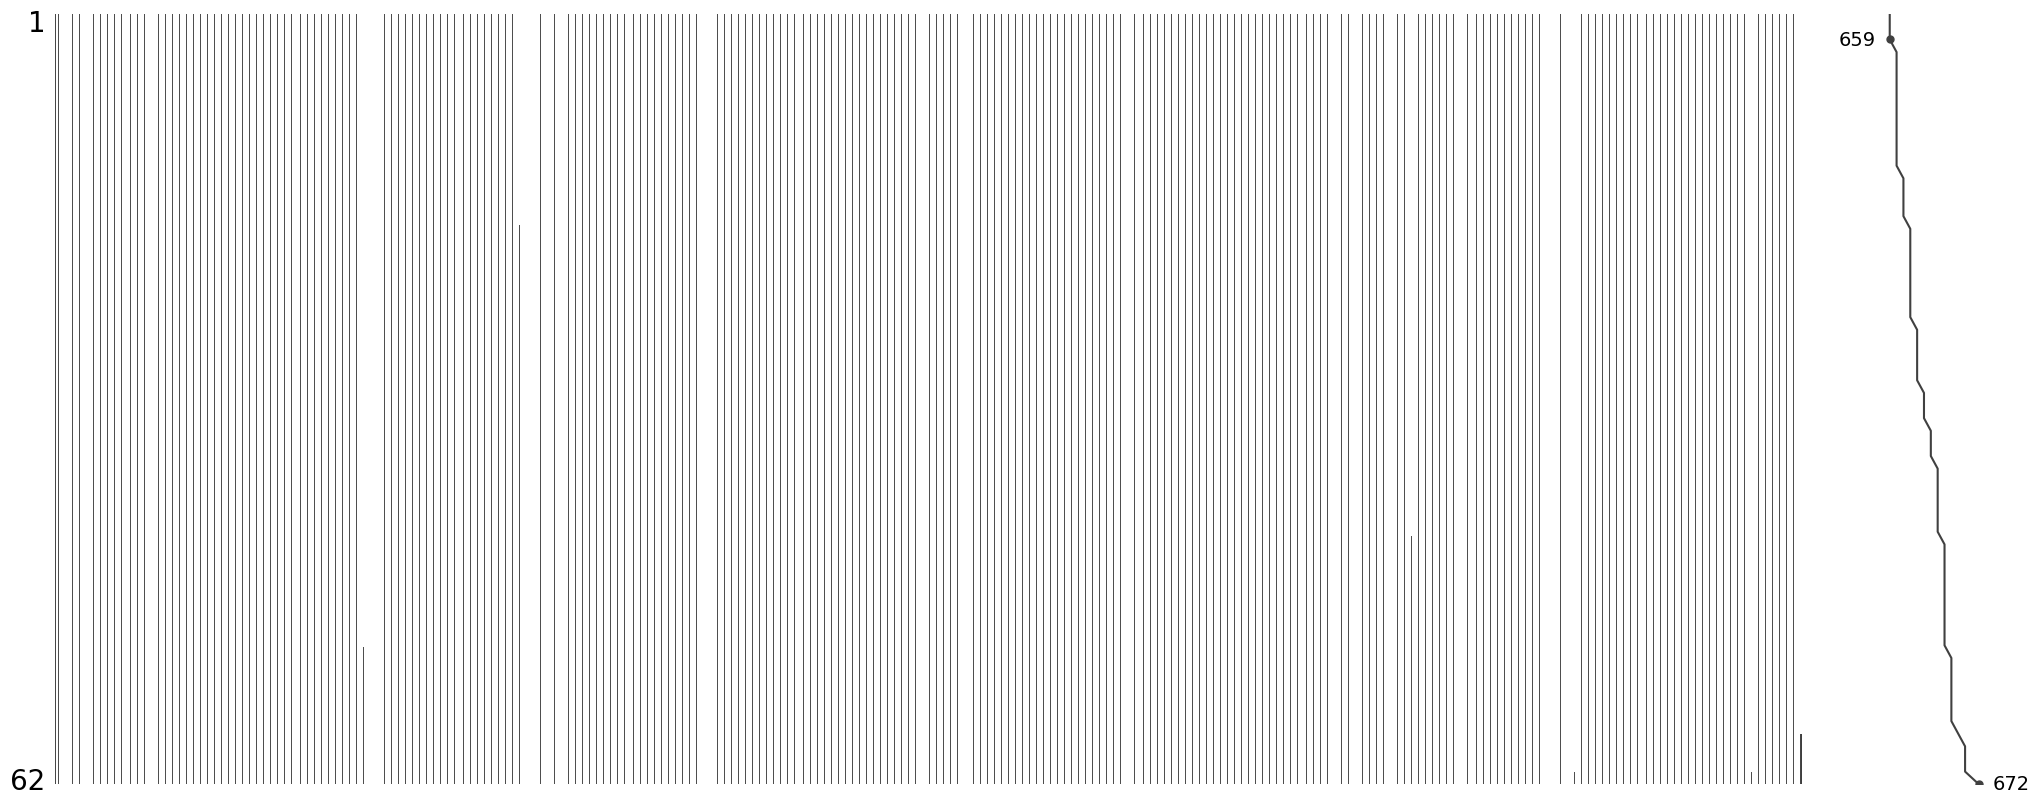

In [13]:
#Plot the missing value matrix
import missingno
missingno.matrix(data)

In [14]:
%%HTML
<h3>We shall remove all the columns with more than 20% of missing data</h3>

In [15]:
print('Data Shape before cleaning =', data.shape)

missing_percentage = data.isnull().mean().sort_values(ascending=False)
dropped_list = sorted(list(missing_percentage[missing_percentage > 0.2].index))
data.drop(labels=dropped_list, axis=1, inplace=True)

print('Data Shape after cleaning =', data.shape)

Data Shape before cleaning = (62, 750)
Data Shape after cleaning = (62, 660)


In [16]:
#Fill the remaining missing values with already available values
data = data.fillna(method='ffill')
data = data.fillna(method='bfill')
print(data)

Ticker         AAA    AAM     ABT     ACB     ACC    ACL  ACM     ADC     ADS  \
DTYYYYMMDD                                                                      
20180402    15.914  6.935  29.091  20.228  11.342  3.405  1.1  10.669  11.919   
20180403    16.998  7.101  28.419  20.146  11.564  3.604  1.1  10.669  11.882   
20180404    17.946  6.935  28.775  20.187  11.564  3.600  1.0  10.669  11.919   
20180405    17.574  6.935  28.735  20.475  11.287  3.446  1.0  10.669  11.955   
20180406    17.540  6.902  28.854  20.927  11.287  3.559  1.1  10.669  11.955   
...            ...    ...     ...     ...     ...    ...  ...     ...     ...   
20180625    17.138  6.935  30.040  16.158  10.916  4.054  0.9  11.156  12.075   
20180626    17.005  7.134  30.395  15.911  10.916  4.054  0.9  11.156  12.037   
20180627    16.609  7.035  30.395  15.418  10.916  4.054  0.9  11.156  12.000   
20180628    16.653  7.101  30.040  14.842  10.795  4.054  0.9  11.156  11.962   
20180629    16.653  7.134  3

In [17]:
import numpy as np

#Calculate returns and create a data frame
returns = data.pct_change()

returns.replace([np.inf, -np.inf], np.nan, inplace=True)
returns.dropna(inplace=True)

print(returns)
data1 = returns


Ticker        AAA    AAM    ABT    ACB    ACC    ACL    ACM  ADC    ADS  \
DTYYYYMMDD                                                                
20180403    0.068  0.024 -0.023 -0.004  0.020  0.058  0.000  0.0 -0.003   
20180404    0.056 -0.023  0.013  0.002  0.000 -0.001 -0.091  0.0  0.003   
20180405   -0.021  0.000 -0.001  0.014 -0.024 -0.043  0.000  0.0  0.003   
20180406   -0.002 -0.005  0.004  0.022  0.000  0.033  0.100  0.0  0.000   
20180409    0.070 -0.014  0.003  0.004  0.000  0.014  0.000  0.0 -0.021   
...           ...    ...    ...    ...    ...    ...    ...  ...    ...   
20180625   -0.008  0.040  0.000 -0.003 -0.027  0.000  0.000  0.0  0.003   
20180626   -0.008  0.029  0.012 -0.015  0.000  0.000  0.000  0.0 -0.003   
20180627   -0.023 -0.014  0.000 -0.031  0.000  0.000  0.000  0.0 -0.003   
20180628    0.003  0.009 -0.012 -0.037 -0.011  0.000  0.000  0.0 -0.003   
20180629    0.000  0.005  0.000 -0.014  0.006  0.000  0.000  0.0  0.000   

Ticker        AGM  ...  

In [18]:
returns = returns.reset_index()
returns = returns.drop(['DTYYYYMMDD'], axis=1)
returns.head()

Ticker,AAA,AAM,ABT,ACB,ACC,ACL,ACM,ADC,ADS,AGM,...,VTB,VTH,VTJ,VTL,VTO,VTV,VXB,WCS,WSS,X20
0,0.068,0.024,-0.023,-0.004,0.020,0.058,0.000,0.0,-0.003,0.001,...,-0.003,0.0,0.043,0.0,0.001,0.060,0.0,0.000,-0.027,0.000
1,0.056,-0.023,0.013,0.002,0.000,-0.001,-0.091,0.0,0.003,0.003,...,0.000,0.0,0.000,0.0,0.017,-0.032,0.0,-0.002,-0.056,0.000
2,-0.021,0.000,-0.001,0.014,-0.024,-0.043,0.000,0.0,0.003,0.007,...,0.015,0.0,0.000,0.0,-0.012,0.020,0.0,0.000,0.059,-0.097
3,-0.002,-0.005,0.004,0.022,0.000,0.033,0.100,0.0,0.000,-0.005,...,0.020,0.0,0.000,0.0,0.002,-0.026,0.0,0.000,0.028,0.042
4,0.070,-0.014,0.003,0.004,0.000,0.014,0.000,0.0,-0.021,-0.070,...,0.050,0.0,0.000,0.0,0.027,0.000,0.0,0.002,-0.054,0.000


In [19]:
%%HTML
<h1>Customized Features</h1>

In [20]:
%%HTML
<h3>We will be adding some fundamental values as well to make the model more robust</h3>

In [21]:
import numpy as np

#Calculate returns and create a data frame
returns1 = data.pct_change().mean()*62
returns1 = pd.DataFrame(returns1)
returns1.columns = ['mean returns']

#Calculate the volatility
returns1['volatility'] = data.pct_change().std()*np.sqrt(62)
print(returns1)

        mean returns  volatility
Ticker                          
AAA            0.075       0.245
AAM            0.034       0.105
ABT            0.053       0.203
ACB           -0.297       0.249
ACC           -0.030       0.174
...              ...         ...
VTV           -0.024       0.306
VXB            0.177       0.239
WCS           -0.055       0.254
WSS           -0.261       0.210
X20           -0.563       0.335

[660 rows x 2 columns]


In [22]:
returns_trans = returns.transpose()

In [23]:
X = np.hstack((returns_trans, returns1))
print(X.shape)

(660, 63)


In [24]:
%%HTML
<h1>Scale the Data</h1>

In [25]:
from sklearn import preprocessing

X = preprocessing.StandardScaler().fit_transform(X)
print(X.shape)

(660, 63)


In [26]:
%%HTML
<h1>DBSCAN Clustering</h1>

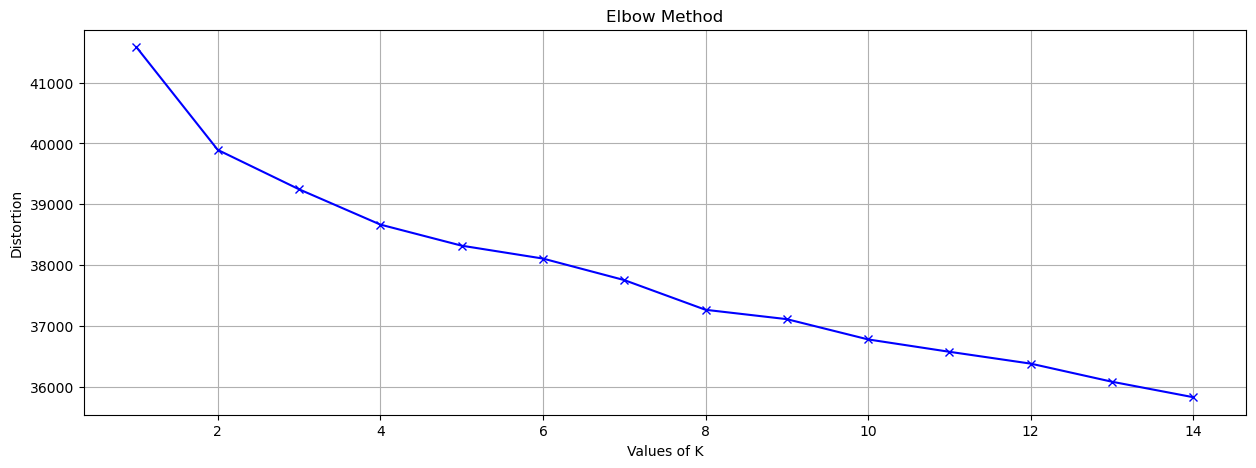

In [27]:
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

K = range(1,15)
distortions = []

#Fit the method
for k in K:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

#Plot the results
fig = plt.figure(figsize= (15,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

In [28]:
from kneed import KneeLocator
kl = KneeLocator(K, distortions, curve="convex", direction="decreasing")
kl.elbow

8

In [29]:
c = 100
#Fit the model
k_means = KMeans(n_clusters=c)
k_means.fit(X)
prediction = k_means.predict(X)

labels = kmeans.labels_
clustered = kmeans.labels_

In [30]:
from sklearn import metrics
print("kmeans", metrics.silhouette_score(X, k_means.labels_, metric='euclidean'))

kmeans -0.028918579024983616


In [31]:
%%HTML
<h1>Cluster Visualization</h1>

In [32]:
# the initial dimensionality of the search was
ticker_count = len(returns.columns)
print("Total pairs possible in universe: %d " % (ticker_count*(ticker_count-1)/2))

Total pairs possible in universe: 217470 


In [33]:
clustered_series = pd.Series(index=returns.columns, data=clustered.flatten())
clustered_series_all = pd.Series(index=returns.columns, data=clustered.flatten())
clustered_series = clustered_series[clustered_series != -1]

In [34]:
from sklearn.manifold import TSNE
X_tsne = TSNE(init = "random", learning_rate=1000, perplexity=25, random_state=1337).fit_transform(X)

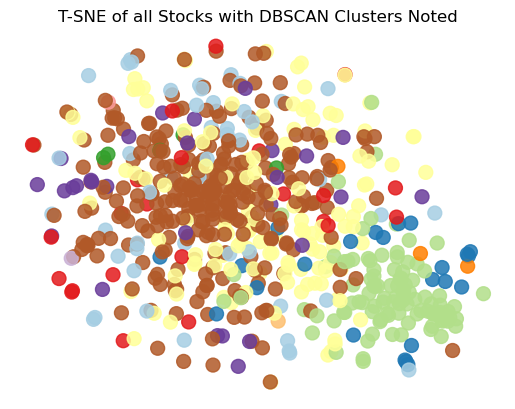

In [35]:
import matplotlib.cm as cm
plt.figure(1, facecolor='white')
plt.clf()
plt.axis('off')
plt.scatter(
    X_tsne[(labels!=-1), 0],
    X_tsne[(labels!=-1), 1],
    s=100,
    alpha=0.85,
    c=labels[labels!=-1],
    cmap=cm.Paired
)

plt.scatter(
    X_tsne[(clustered_series_all==-1).values, 0],
    X_tsne[(clustered_series_all==-1).values, 1],
    s=100,
    alpha=0.05
)

plt.title('T-SNE of all Stocks with DBSCAN Clusters Noted');

Text(0, 0.5, 'Cluster Number')

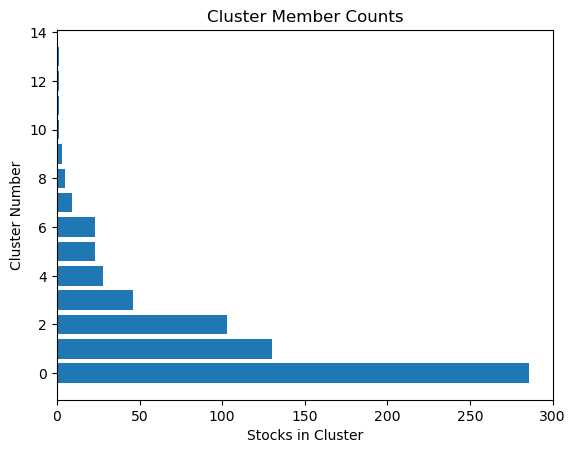

In [36]:
plt.barh(range(len(clustered_series.value_counts())), clustered_series.value_counts())
plt.title('Cluster Member Counts')
plt.xlabel('Stocks in Cluster')
plt.ylabel('Cluster Number')

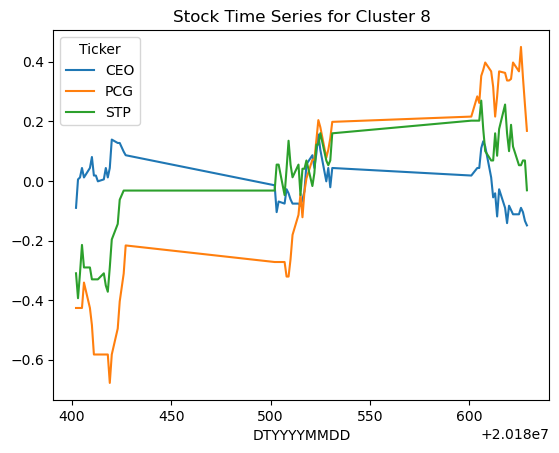

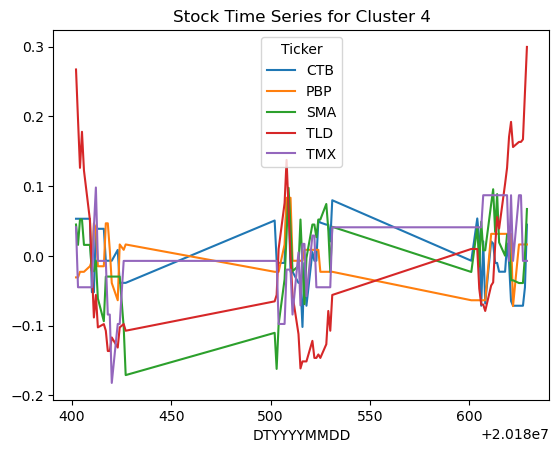

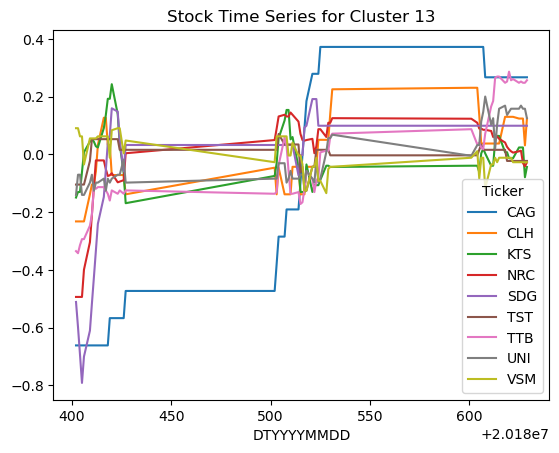

In [37]:
# get the number of stocks in each cluster
counts = clustered_series.value_counts()

# let's visualize some clusters
cluster_vis_list = list(counts[(counts<20) & (counts>1)].index)[::-1]

# plot a handful of the smallest clusters
for clust in cluster_vis_list[0:min(len(cluster_vis_list), 3)]:
    tickers = list(clustered_series[clustered_series==clust].index)
    means = np.log(data[tickers].mean())
    datas = np.log(data[tickers]).sub(means)
    datas.plot(title='Stock Time Series for Cluster %d' % clust)

In [38]:
%%HTML
<h1>Pair Selection</h1>

In [39]:
CLUSTER_SIZE_LIMIT = 9999
counts = clustered_series.value_counts()
ticker_count_reduced = counts[(counts>1) & (counts<=CLUSTER_SIZE_LIMIT)]
print ("Clusters formed: %d" % len(ticker_count_reduced))
print ("Pairs to evaluate: %d" % (ticker_count_reduced*(ticker_count_reduced-1)).sum())

Clusters formed: 10
Pairs to evaluate: 112722


In [40]:
%%HTML
<h3>Cointegration and pair selection function</h3>

In [41]:
def find_cointegrated_pairs(data, significance=0.05):
    # This function is from https://www.quantopian.com/lectures/introduction-to-pairs-trading
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(1):
        for j in range(i+1, n):
            S1 = data[keys[i]]            
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < significance:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs

In [42]:
from statsmodels.tsa.stattools import coint

cluster_dict = {}
for i, which_clust in enumerate(ticker_count_reduced.index):
    tickers = clustered_series[clustered_series == which_clust].index
    score_matrix, pvalue_matrix, pairs = find_cointegrated_pairs(returns[tickers])
    cluster_dict[which_clust] = {}
    cluster_dict[which_clust]['score_matrix'] = score_matrix
    cluster_dict[which_clust]['pvalue_matrix'] = pvalue_matrix
    cluster_dict[which_clust]['pairs'] = pairs

In [43]:
pairs = []
for clust in cluster_dict.keys():
    pairs.extend(cluster_dict[clust]['pairs'])

In [44]:
pairs

[('AAM', 'ABT'),
 ('AAM', 'ACC'),
 ('AAM', 'ADC'),
 ('AAM', 'ADS'),
 ('AAM', 'ALT'),
 ('AAM', 'AME'),
 ('AAM', 'AMV'),
 ('AAM', 'APG'),
 ('AAM', 'APP'),
 ('AAM', 'ASP'),
 ('AAM', 'BAB'),
 ('AAM', 'BBC'),
 ('AAM', 'BBS'),
 ('AAM', 'BCE'),
 ('AAM', 'BCG'),
 ('AAM', 'BED'),
 ('AAM', 'BKC'),
 ('AAM', 'BMC'),
 ('AAM', 'BMI'),
 ('AAM', 'BPC'),
 ('AAM', 'BRC'),
 ('AAM', 'BSC'),
 ('AAM', 'BSI'),
 ('AAM', 'BST'),
 ('AAM', 'BTS'),
 ('AAM', 'BXH'),
 ('AAM', 'C32'),
 ('AAM', 'C47'),
 ('AAM', 'C92'),
 ('AAM', 'CAN'),
 ('AAM', 'CAP'),
 ('AAM', 'CAV'),
 ('AAM', 'CCI'),
 ('AAM', 'CDC'),
 ('AAM', 'CEE'),
 ('AAM', 'CHP'),
 ('AAM', 'CIA'),
 ('AAM', 'CIG'),
 ('AAM', 'CII'),
 ('AAM', 'CJC'),
 ('AAM', 'CKV'),
 ('AAM', 'CLC'),
 ('AAM', 'CLM'),
 ('AAM', 'CMS'),
 ('AAM', 'CMV'),
 ('AAM', 'CNG'),
 ('AAM', 'COM'),
 ('AAM', 'CSC'),
 ('AAM', 'CSV'),
 ('AAM', 'CTC'),
 ('AAM', 'CX8'),
 ('AAM', 'D2D'),
 ('AAM', 'DAD'),
 ('AAM', 'DAE'),
 ('AAM', 'DAG'),
 ('AAM', 'DAH'),
 ('AAM', 'DGC'),
 ('AAM', 'DHA'),
 ('AAM', 'DHC'

In [45]:
%%HTML
<h1>TSNE Visualization of Pairs</h1>

In [46]:
from sklearn.manifold import TSNE
import matplotlib.cm as cm

stocks = np.unique(pairs)
X_df = pd.DataFrame(index=returns.T.index, data=X)
in_pairs_series = clustered_series.loc[stocks]
stocks = list(np.unique(pairs))
X_pairs = X_df.loc[stocks]

X_tsne = TSNE(init = "random", learning_rate=50, perplexity=3, random_state=1337).fit_transform(X_pairs)

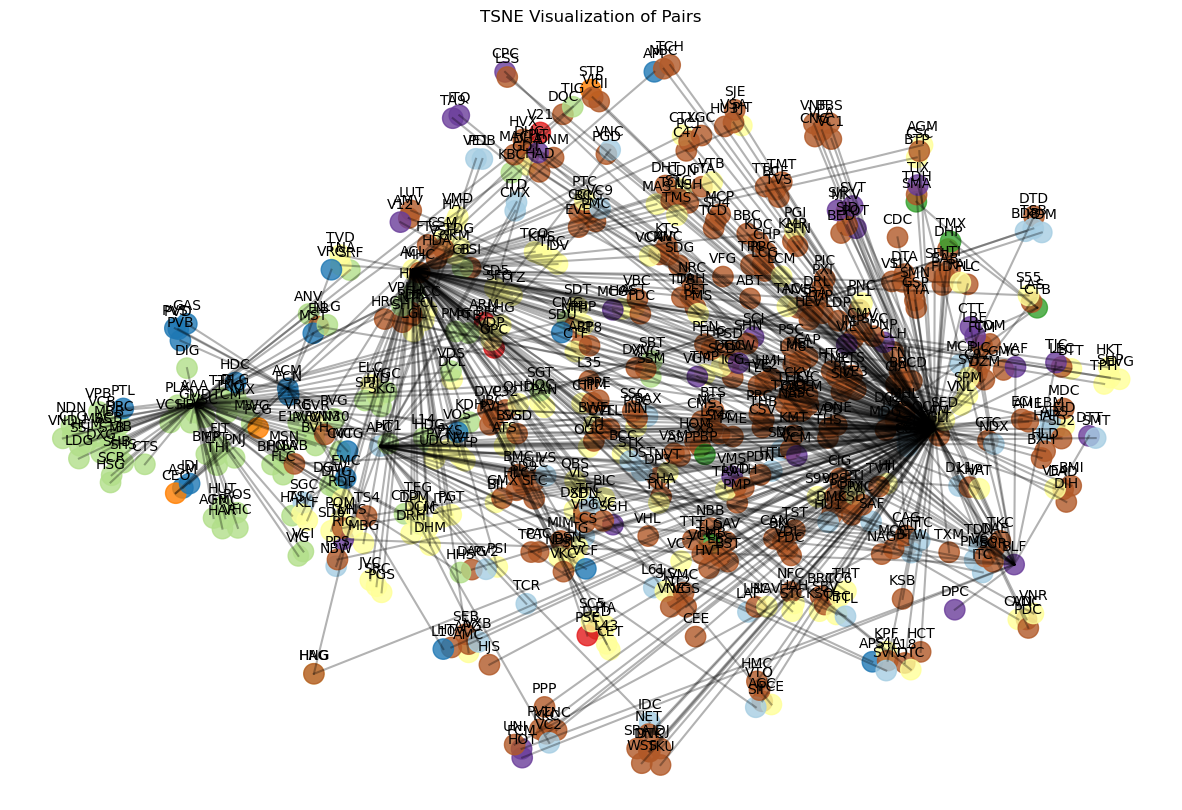

In [47]:
plt.figure(1, facecolor='white',figsize=(15,10))
plt.clf()
plt.axis('off')
for pair in pairs:
    ticker1 = pair[0]
    loc1 = X_pairs.index.get_loc(pair[0])
    x1, y1 = X_tsne[loc1, :]
    ticker2 = pair[1]
    loc2 = X_pairs.index.get_loc(pair[1])
    x2, y2 = X_tsne[loc2, :]
    plt.plot([x1, x2], [y1, y2], 'k-', alpha=0.3);
    
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], s=215, alpha=0.8, c=in_pairs_series.values, cmap=cm.Paired)
plt.title('TSNE Visualization of Pairs'); 

# Join pairs by x and y
for x,y,name in zip(X_tsne[:,0],X_tsne[:,1],X_pairs.index):

    label = name

    plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center')
    
plt.show()